In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
df=pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'], index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
# Calculate quantiles for the top and bottom 2.5%
lower_quantile = df['value'].quantile(0.025)
upper_quantile = df['value'].quantile(0.975)

# Filter the DataFrame
df = df[(df['value'] > lower_quantile) & (df['value'] < upper_quantile)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


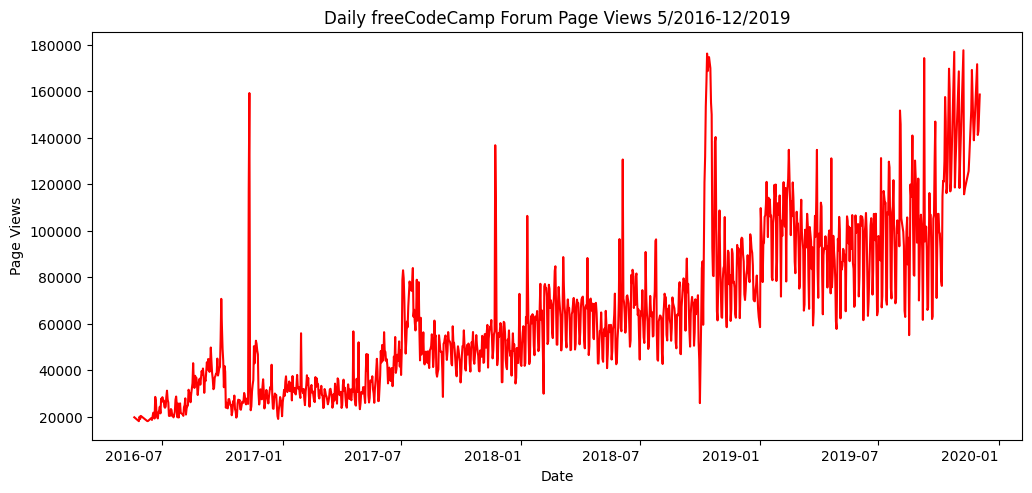

In [4]:
# Create the plot
def draw_line_plot():
    fig=df.plot.line(figsize=(12,6),color='red',legend=False)

    # Set the title and labels
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')


    # Rotate date labels for better readability
    plt.xticks(rotation=0)
    fig = fig.figure
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')

# Call the function to draw the plot
draw_line_plot()

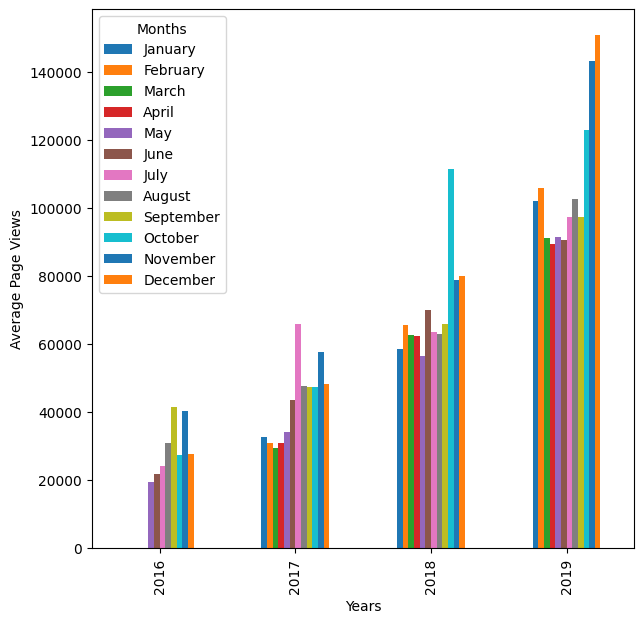

In [5]:
# Extract year and month from the date
def draw_bar_plot():
    df_bar=df.copy()
    df_bar['year'] = df.index.year
    df_bar['month'] = df.index.month_name()
# grouping and orgenizing the df
    df_bar_group = df_bar.groupby(['year', 'month'])['value'].mean()
    df_bar_group = df_bar_group.unstack(level='month')
    df_bar_group = df_bar_group[['January', 'February', 'March', 'April', 'May',
                                'June', 'July', 'August', 'September', 'October', 'November', 'December']]

    # Draw bar plot
    fig = df_bar_group.plot.bar(figsize=(7,7)).figure
    plt.xlabel('Years');
    #plt.xticks(rotation = 0)
    plt.ylabel('Average Page Views');
    plt.legend(title='Months');

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')

# Call the function to draw the plot
draw_bar_plot()

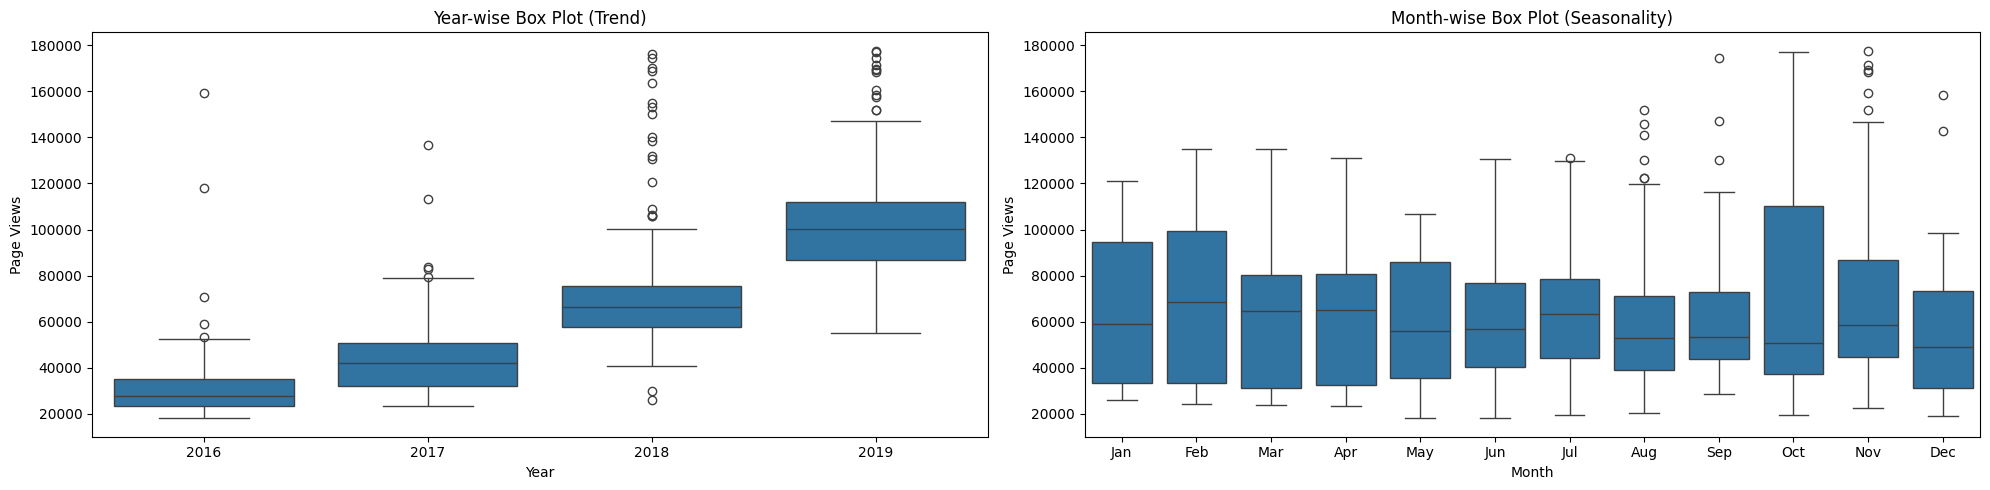

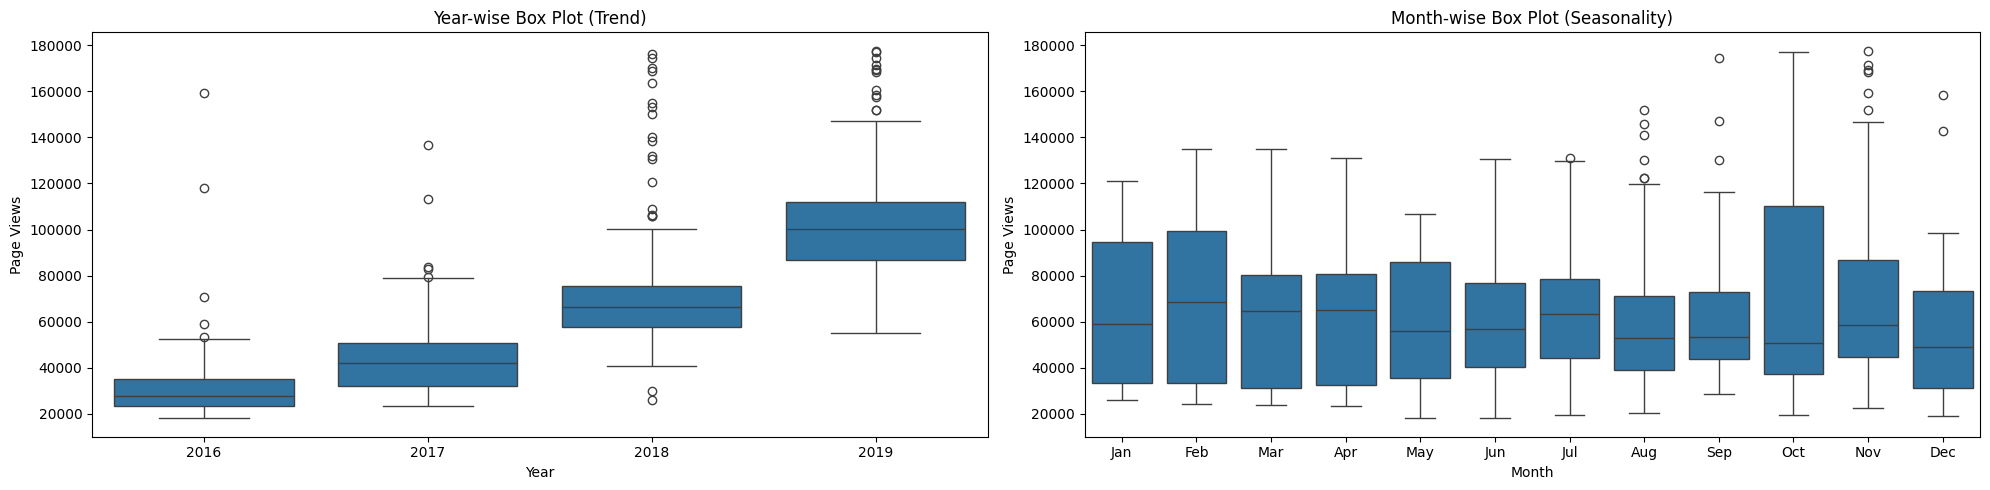

In [6]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')

    # Define month order
    mon_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    # Year-wise Box Plot (Trend)
    sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')

    # Month-wise Box Plot (Seasonality)
    sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=mon_order)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')

    # Adjust layout for better readability
    fig.tight_layout()

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()